In [1]:
# Import libraries
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
pd.set_option('display.max_rows', None)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configurations of the plots

pd.options.display.float_format = '{:.2f}'.format

# Read data
path = os.getcwd()
df = pd.read_csv(path +'/movies.csv')
# Looka at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [2]:
# Check any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
df.dropna(inplace = True)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [6]:
# To check the original year vs the released year and found out some are different
# In this case, we use released year for reference

pattern = r'(?:(?P<month>\w+) )?(?P<year>\d{4}) \((?P<country>.+)\)'

df_extracted = df['released'].str.extract(pattern)
df_extracted.rename(columns = {'year': 'yearcorrect', 'country': 'countrycorrect'}, inplace = True)
df2 = pd.concat([df, df_extracted['yearcorrect']], axis = 1)
df2['yearcorrect'] = df2['yearcorrect'].astype('int64')
df2['yearMatched?'] = np.where(df2['year'] == df2['yearcorrect'], True, False)
df2['yearMatched?'].value_counts()

True     4713
False     708
Name: yearMatched?, dtype: int64

In [7]:
df2.sort_values(by = ['gross'], inplace = True, ascending = False)

In [8]:
# Drop any duplicates
df2 = df2.drop_duplicates().copy()

In [9]:
# Assumption made
# Budget high correction
# Company high correction

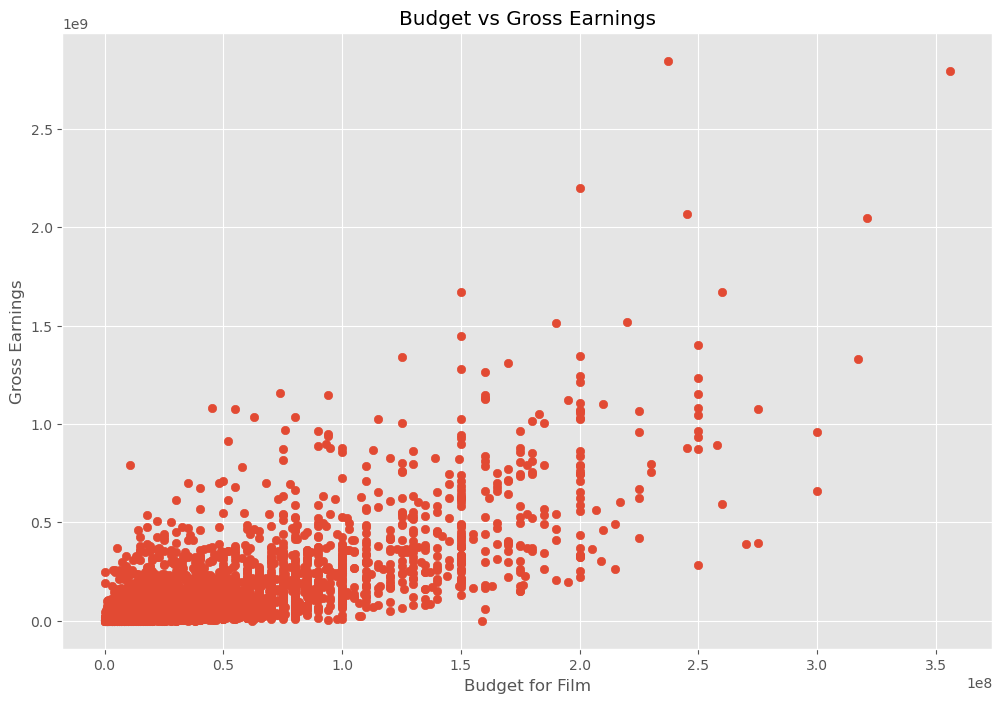

In [10]:
# Scatter plot with budget vs gross

plt.scatter(x = df2['budget'], y = df2['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()


In [11]:
df2.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,yearMatched?
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.00,2009,True
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.00,2019,True
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.00,1997,True
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.00,2015,True
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.00,2018,True


<AxesSubplot:xlabel='budget', ylabel='gross'>

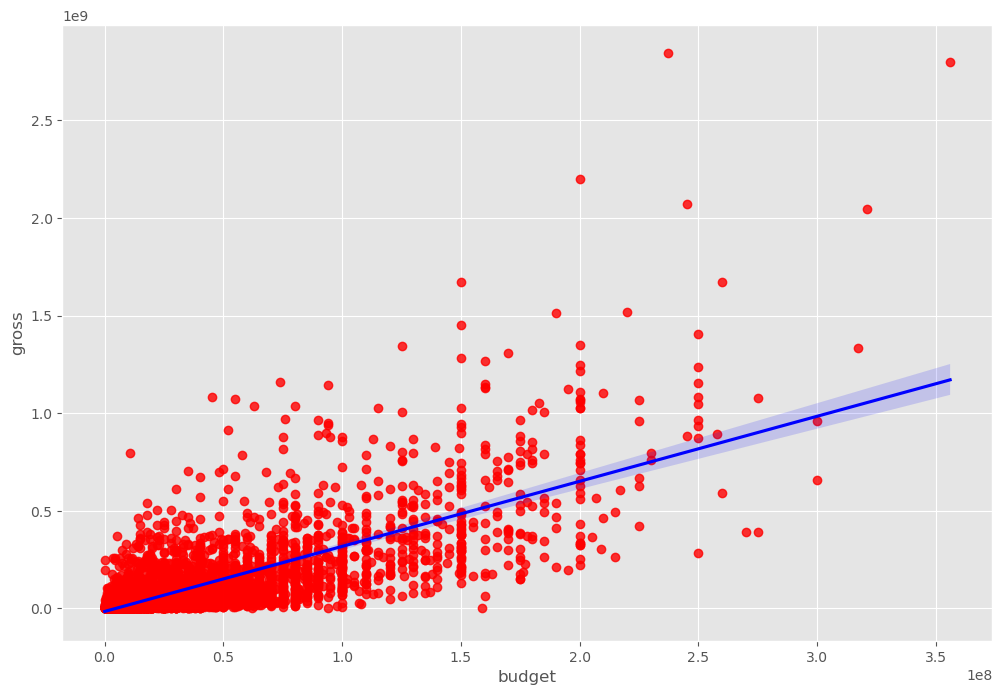

In [12]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df2, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

In [13]:
# Let's start looking at correlation

df2.corr() #method = pearson, kendall, spearman
# To demonstrate high correlation between budget and gross


,year,score,votes,budget,gross,runtime,yearcorrect,yearMatched?
year,1.00,0.06,0.21,0.33,0.27,0.08,1.00,-0.02
score,0.06,1.00,0.47,0.07,0.22,0.41,0.06,-0.16
votes,0.21,0.47,1.00,0.44,0.61,0.35,0.20,0.06
budget,0.33,0.07,0.44,1.00,0.74,0.32,0.32,0.18
gross,0.27,0.22,0.61,0.74,1.00,0.28,0.27,0.13
runtime,0.08,0.41,0.35,0.32,0.28,1.00,0.08,-0.04
yearcorrect,1.00,0.06,0.20,0.32,0.27,0.08,1.00,-0.05
yearMatched?,-0.02,-0.16,0.06,0.18,0.13,-0.04,-0.05,1.00


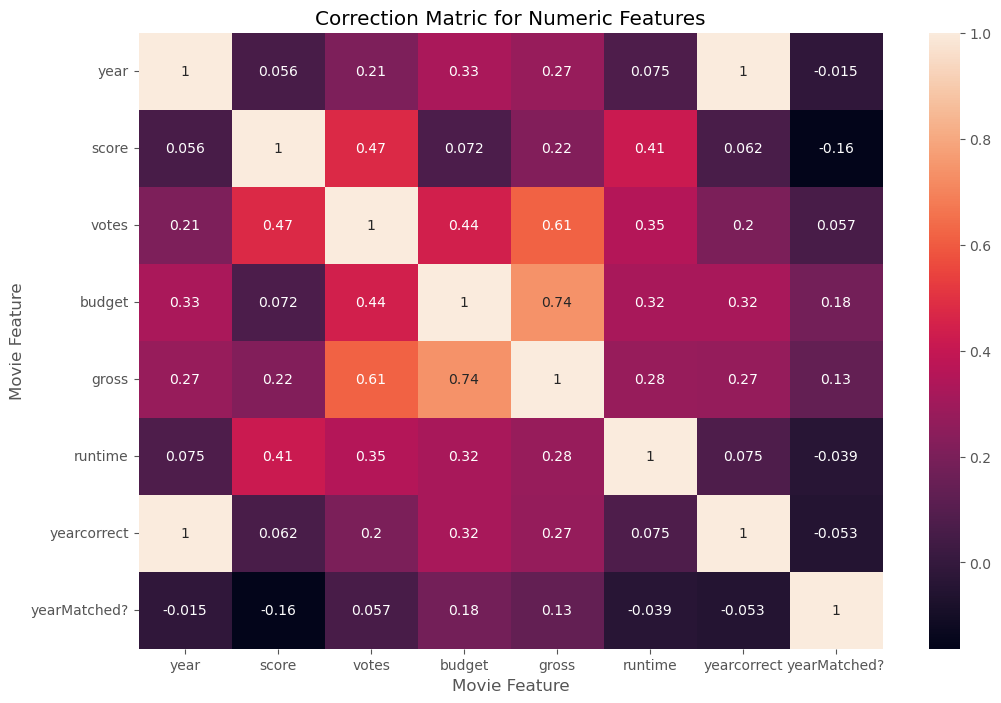

In [14]:
correlation_matrix = df2.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correction Matric for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

plt.show()

In [15]:
# Look at Company

df_numerized = df2.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,yearMatched?
5445,386,5,0,2009,527,7.80,1100000.00,785,1263,1534,47,237000000,2847246203,1382,162.00,2009,True
7445,388,5,0,2019,137,8.40,903000.00,105,513,1470,47,356000000,2797501328,983,181.00,2019,True
3045,4909,5,6,1997,534,7.80,1100000.00,785,1263,1073,47,200000000,2201647264,1382,194.00,1997,True
6663,3643,5,0,2015,529,7.80,876000.00,768,1806,356,47,245000000,2069521700,945,138.00,2015,True
7244,389,5,0,2018,145,8.40,897000.00,105,513,1470,47,321000000,2048359754,983,149.00,2018,True


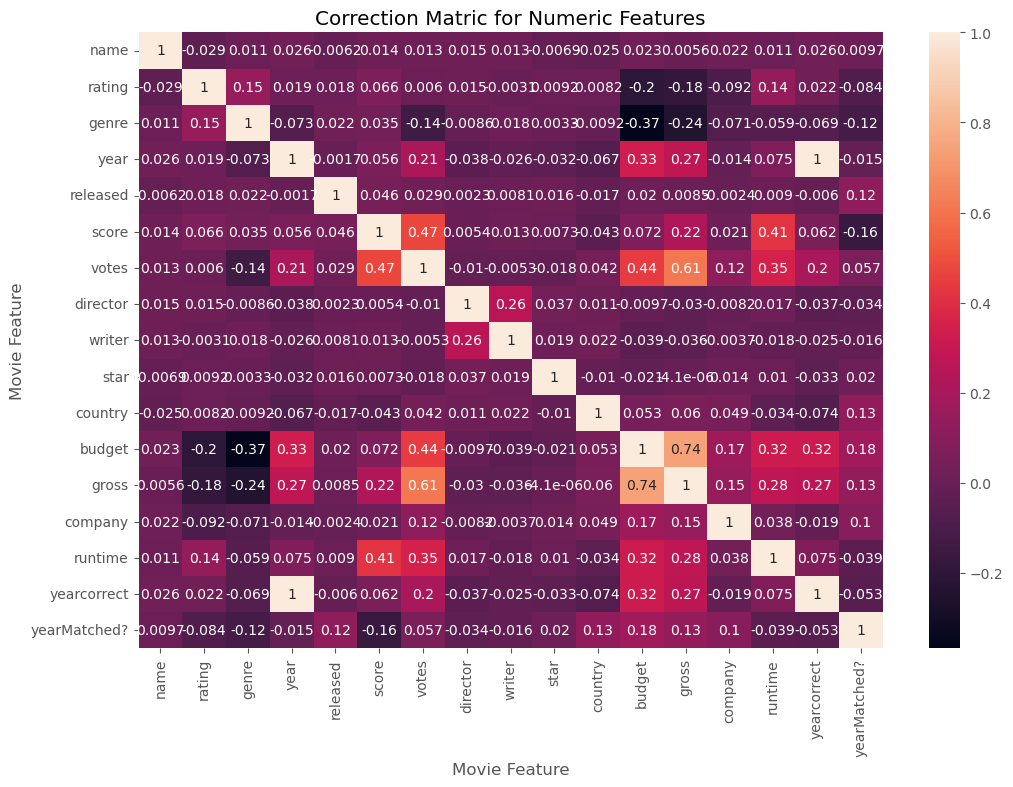

In [16]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correction Matric for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

plt.show()

In [17]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,yearMatched?
name,1.00,-0.03,0.01,0.03,-0.01,0.01,0.01,0.02,0.01,-0.01,-0.03,0.02,0.01,0.02,0.01,0.03,0.01
rating,-0.03,1.00,0.15,0.02,0.02,0.07,0.01,0.01,-0.00,0.01,0.01,-0.20,-0.18,-0.09,0.14,0.02,-0.08
genre,0.01,0.15,1.00,-0.07,0.02,0.04,-0.14,-0.01,0.02,0.00,-0.01,-0.37,-0.24,-0.07,-0.06,-0.07,-0.12
year,0.03,0.02,-0.07,1.00,-0.00,0.06,0.21,-0.04,-0.03,-0.03,-0.07,0.33,0.27,-0.01,0.08,1.00,-0.02
released,-0.01,0.02,0.02,-0.00,1.00,0.05,0.03,0.00,0.01,0.02,-0.02,0.02,0.01,-0.00,0.01,-0.01,0.12
score,0.01,0.07,0.04,0.06,0.05,1.00,0.47,0.01,0.01,0.01,-0.04,0.07,0.22,0.02,0.41,0.06,-0.16
votes,0.01,0.01,-0.14,0.21,0.03,0.47,1.00,-0.01,-0.01,-0.02,0.04,0.44,0.61,0.12,0.35,0.20,0.06
director,0.02,0.01,-0.01,-0.04,0.00,0.01,-0.01,1.00,0.26,0.04,0.01,-0.01,-0.03,-0.01,0.02,-0.04,-0.03
writer,0.01,-0.00,0.02,-0.03,0.01,0.01,-0.01,0.26,1.00,0.02,0.02,-0.04,-0.04,-0.00,-0.02,-0.03,-0.02
star,-0.01,0.01,0.00,-0.03,0.02,0.01,-0.02,0.04,0.02,1.00,-0.01,-0.02,-0.00,0.01,0.01,-0.03,0.02


In [18]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.00
              rating         -0.03
              genre           0.01
              year            0.03
              released       -0.01
              score           0.01
              votes           0.01
              director        0.02
              writer          0.01
              star           -0.01
              country        -0.03
              budget          0.02
              gross           0.01
              company         0.02
              runtime         0.01
              yearcorrect     0.03
              yearMatched?    0.01
rating        name           -0.03
              rating          1.00
              genre           0.15
              year            0.02
              released        0.02
              score           0.07
              votes           0.01
              director        0.01
              writer         -0.00
              star            0.01
              country         0.01
              budget

In [19]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.37
budget        genre          -0.37
genre         gross          -0.24
gross         genre          -0.24
budget        rating         -0.20
rating        budget         -0.20
              gross          -0.18
gross         rating         -0.18
score         yearMatched?   -0.16
yearMatched?  score          -0.16
genre         votes          -0.14
votes         genre          -0.14
genre         yearMatched?   -0.12
yearMatched?  genre          -0.12
company       rating         -0.09
rating        company        -0.09
              yearMatched?   -0.08
yearMatched?  rating         -0.08
country       yearcorrect    -0.07
yearcorrect   country        -0.07
genre         year           -0.07
year          genre          -0.07
company       genre          -0.07
genre         company        -0.07
yearcorrect   genre          -0.07
genre         yearcorrect    -0.07
year          country        -0.07
country       year           -0.07
genre         runtim

In [20]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]
high_corr

runtime       score          0.41
score         runtime        0.41
budget        votes          0.44
votes         budget         0.44
              score          0.47
score         votes          0.47
gross         votes          0.61
votes         gross          0.61
budget        gross          0.74
gross         budget         0.74
year          yearcorrect    1.00
yearcorrect   year           1.00
name          name           1.00
writer        writer         1.00
runtime       runtime        1.00
company       company        1.00
gross         gross          1.00
budget        budget         1.00
country       country        1.00
star          star           1.00
director      director       1.00
votes         votes          1.00
score         score          1.00
released      released       1.00
year          year           1.00
genre         genre          1.00
rating        rating         1.00
yearcorrect   yearcorrect    1.00
yearMatched?  yearMatched?   1.00
dtype: float64

In [21]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation